# Analyse des sentiments

## 1. Collecte de données par web scraping

In [1]:
import requests
from bs4 import BeautifulSoup
import time

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
import pickle

### 1.1. trustpilot.com

- Les avis à propos de : deel.com

In [ ]:
# page initiale
url = 'https://www.trustpilot.com/review/deel.com'

dico = {}
avis_deel = []

response = requests.get(url)

if response.status_code == 200:

    # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Recherche des avis dans le contenu HTML de la page
    avis_elements = soup.find_all("div",{"class":"styles_cardWrapper__LcCPA"})
    
    # Extraction des avis individuels
    for element in avis_elements:
        try:
            dico["name"] = element.find("span",{"class":"typography_heading-xxs__QKBS8"}).text
            dico["review_text"] = element.find("h2",{"class":"typography_heading-s__f7029"}).text
            dico["review_text2"] = element.find("p",{"class":"typography_body-l__KUYFJ"}).text
            avis_deel.append(dico)
    
            print(dico)
            print('\n\n')
    
            dico={}
            
        except Exception as e:
            print(e)
            pass

else:
    print("Échec de la récupération de la page. Status code:", response.status_code)

In [ ]:
# Toutes les pages suivantes

nbre_pages = 213

for numpage in range(2, nbre_pages+1):
    url = f"https://www.trustpilot.com/review/deel.com?page={numpage}"

    dico = {}
    
    response = requests.get(url)
    
    if response.status_code == 200:
    
        # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Recherche des avis dans le contenu HTML de la page
        avis_elements = soup.find_all("div",{"class":"styles_cardWrapper__LcCPA"})
        
        # Extraction des avis individuels
        for element in avis_elements:
            try:
                dico["name"] = element.find("span",{"class":"typography_heading-xxs__QKBS8"}).text
                dico["review_text"] = element.find("h2",{"class":"typography_heading-s__f7029"}).text
                dico["review_text2"] = element.find("p",{"class":"typography_body-l__KUYFJ"}).text
                avis_deel.append(dico)
        
                print(dico)
                print('\n\n')
        
                dico={}
                
            except Exception as e:
                print(e)
                pass
    
    else:
        print("Échec de la récupération de la page. Status code:", response.status_code)

In [50]:
len(avis_deel)

4242

#### Définition d'une fonction pour automatiser le processus de collecte sur trustpilot.com

In [105]:
def data_on_trustpilot(url, nbre_pages):
    
    # scraping page initiale

    dico = {}
    avis_deel = []
    
    response = requests.get(url)
    
    if response.status_code == 200:
    
        # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Recherche des avis dans le contenu HTML de la page
        avis_elements = soup.find_all("div",{"class":"styles_cardWrapper__LcCPA"})
        
        # Extraction des avis individuels
        for element in avis_elements:
            try:
                dico["name"] = element.find("span",{"class":"typography_heading-xxs__QKBS8"}).text
                dico["review_text"] = element.find("h2",{"class":"typography_heading-s__f7029"}).text
                dico["review_text2"] = element.find("p",{"class":"typography_body-l__KUYFJ"}).text
                avis_deel.append(dico)
                
                print(dico)
                print('\n\n')
        
                dico={}

            except Exception as e:
                print(e)
                pass
    
    else:
        print("Échec de la récupération de la page. Status code:", response.status_code)

    # Toutes les pages suivantes
    
    for numpage in range(2, nbre_pages+1):
        urll = url + '?page=' + str(numpage)

        print('\n')
        print(urll)
    
        dico = {}
        
        response = requests.get(urll)
        
        if response.status_code == 200:
        
            # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
            soup = BeautifulSoup(response.text, "html.parser")
            
            # Recherche des avis dans le contenu HTML de la page
            avis_elements = soup.find_all("div",{"class":"styles_cardWrapper__LcCPA"})
            
            # Extraction des avis individuels
            for element in avis_elements:
                try:
                    dico["name"] = element.find("span",{"class":"typography_heading-xxs__QKBS8"}).text
                    dico["review_text"] = element.find("h2",{"class":"typography_heading-s__f7029"}).text
                    dico["review_text2"] = element.find("p",{"class":"typography_body-l__KUYFJ"}).text
                    avis_deel.append(dico)
            
                    print(dico)
                    print('\n\n')
            
                    dico={}

                except Exception as e:
                    print(e)
                    pass
        
        else:
            print("Échec de la récupération de la page. Status code:", response.status_code)

    return avis_deel

- Les avis à propos de : deel.com

In [ ]:
url = 'https://www.trustpilot.com/review/deel.com'
nbre_pages = 213
datas_deel = data_on_trustpilot(url, nbre_pages)

In [107]:
len(datas_deel)

3465

In [108]:
# Enregistrer les données dans une liste globale

all_datas = []

for i in datas_deel:
    a = {'website': 'trustpilot.com', 'app': 'deel.com', 'avis': i['review_text2']}
    all_datas.append(a)

len(all_datas)

3465

- Les avis à propos de : Remote.com

In [ ]:
url = 'https://www.trustpilot.com/review/remote.com'
nbre_pages = 57
datas_remote = data_on_trustpilot(url, nbre_pages)

In [111]:
len(datas_remote)

1005

In [112]:
# ajouter à la liste globale

for i in datas_remote:
    a = {'website': 'trustpilot.com', 'app': 'remote.com', 'avis': i['review_text2']}
    all_datas.append(a)

len(all_datas)

4470

- Les avis à propos de : Oysterhr.com

In [ ]:
url = 'https://www.trustpilot.com/review/www.oysterhr.com'
nbre_pages = 5
datas_oysterhr = data_on_trustpilot(url, nbre_pages)

In [114]:
len(datas_oysterhr)

89

In [115]:
# ajouter à la liste globale

for i in datas_oysterhr:
    a = {'website': 'trustpilot.com', 'app': 'oysterhr.com', 'avis': i['review_text2']}
    all_datas.append(a)

len(all_datas)

4559

- Les avis à propos de : Multiplier.com

In [ ]:
url = 'https://www.trustpilot.com/review/usemultiplier.com'
nbre_pages = 18
datas_multiplier = data_on_trustpilot(url, nbre_pages)

In [117]:
len(datas_multiplier)

330

In [118]:
# ajouter à la liste globale

for i in datas_multiplier:
    a = {'website': 'trustpilot.com', 'app': 'multiplier.com', 'avis': i['review_text2']}
    all_datas.append(a)

len(all_datas)

4889

- Les avis à propos de : Rippling.com

In [ ]:
url = 'https://www.trustpilot.com/review/rippling.com'
nbre_pages = 52
datas_rippling = data_on_trustpilot(url, nbre_pages)

In [120]:
len(datas_rippling)

982

In [121]:
# ajouter à la liste globale

for i in datas_rippling:
    a = {'website': 'trustpilot.com', 'app': 'rippling.com', 'avis': i['review_text2']}
    all_datas.append(a)

len(all_datas)

5871

In [122]:
# Enregistrer dans un fichier binaire avec pickle

with open('all_datas.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(all_datas)

In [193]:
# Encodage sous forme de dataframe pandas

with open('all_datas.pkl', 'rb') as fichier:
    datas = pickle.load(fichier)
    
pd_all_datas = pd.DataFrame(datas)
pd_all_datas

,website,app,avis
0,trustpilot.com,deel.com,Super quick and comprehensive response. Saves ...
1,trustpilot.com,deel.com,I've been working remotely for 2 years and bee...
2,trustpilot.com,deel.com,Great experience for a first timer like me. It...
3,trustpilot.com,deel.com,Super accessible 24x7 with quick and detailed ...
4,trustpilot.com,deel.com,My experience after almost a year with Deel ha...
...,...,...,...
5866,trustpilot.com,rippling.com,Since my company has switched over to using Ri...
5867,trustpilot.com,rippling.com,Rippling has really streamlined all the HR and...
5868,trustpilot.com,rippling.com,Rippling has made managing all my HR concerns ...
5869,trustpilot.com,rippling.com,Rippling has made onboarding with my new job s...


### 1.2. capterra.com

- Les avis à propos de : deel.com

In [186]:
url = "https://www.capterra.com/p/205015/Deel/reviews/"
driver = webdriver.Chrome()
driver.get(url)

# charger plus de contenu sur la page
button_exists = True 

delay = 30

while button_exists == True:
    try:
        load_more_button = WebDriverWait(driver,delay).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="__capterra__"]/div[2]/div[3]/div[32]/button'))) 
        load_more_button.click()
        time.sleep(10)
    except:
        button_exists = False 

# Obtenir le contenu HTML de la page finale après avoir chargé toutes les critiques
html = driver.page_source

# Analyser le contenu HTML
soup = BeautifulSoup(html, 'html.parser')

reviews_containers = soup.find_all('div', class_="p-xl bg-neutral-10")

# Fermer le WebDriver
driver.quit()

In [184]:
# Extraction des avis

datas2_deel = []

for container in reviews_containers:

    try:
        text0_tag = container.find('div', attrs={'class': "mt-2xl text-lg font-bold md:mt-0"})
        text0 = text0_tag.get_text(strip=True) if text0_tag else None
        text0 = text0 if text0 else ''
        
    except Exception:
        pass
    
    try:
        text1_tag = container.find('div', attrs={'data-testid': "overall-content"})
        text1 = text1_tag.get_text(strip=True) if text1_tag else None
        text1 = text1 if text1 else ''
        
    except Exception:
        pass

    try:
        text2_tag = container.find('div', attrs={'data-testid': "pros-content"})
        text2 = text2_tag.get_text(strip=True) if text2_tag else None
        text2 = text2 if text2 else ''

    except Exception:
        pass

    try:
        text3_tag = container.find('div', attrs={'data-testid': "cons-content"})
        text3 = text3_tag.get_text(strip=True) if text3_tag else None
        text3 = text3 if text3 else ''

    except Exception:
        pass

    try:
        text4_tag = container.find('div', attrs={'data-testid': "reasons-for-choosing-content"})
        text4 = text4_tag.get_text(strip=True) if text4_tag else None
        text4 = text4 if text4 else ''

    except Exception:
        pass

    # jointure
    text = text0 + ' ' + text1 + ' ' + text2 + ' ' + text3 + ' ' + text4

    # insertion dans la liste
    datas2_deel.append(text)

#### Définition d'une fonction pour automatiser le processus de collecte sur capterra.com

In [195]:
def data_on_capterra(url):
    driver = webdriver.Chrome()
    driver.get(url)
    
    button_exists = True 
    
    delay = 30

    # charger plus de contenu sur la page 
    while button_exists == True:
        try:
            load_more_button = WebDriverWait(driver,delay).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="__capterra__"]/div[2]/div[3]/div[32]/button'))) 
            load_more_button.click()
            time.sleep(10)
        except:
            button_exists = False 
    
    # Obtenir le contenu HTML de la page finale après avoir chargé toutes les critiques
    html = driver.page_source
    
    # Analyser le contenu HTML
    soup = BeautifulSoup(html, 'html.parser')
    
    reviews_containers = soup.find_all('div', class_="p-xl bg-neutral-10")
    
    # Fermer le WebDriver
    driver.quit()

    # Extraction des avis

    avis = []
    
    for container in reviews_containers:
    
        try:
            text0_tag = container.find('div', attrs={'class': "mt-2xl text-lg font-bold md:mt-0"})
            text0 = text0_tag.get_text(strip=True) if text0_tag else None
            text0 = text0 if text0 else ''
            
        except Exception:
            pass
        
        try:
            text1_tag = container.find('div', attrs={'data-testid': "overall-content"})
            text1 = text1_tag.get_text(strip=True) if text1_tag else None
            text1 = text1 if text1 else ''
            
        except Exception:
            pass
    
        try:
            text2_tag = container.find('div', attrs={'data-testid': "pros-content"})
            text2 = text2_tag.get_text(strip=True) if text2_tag else None
            text2 = text2 if text2 else ''
    
        except Exception:
            pass
    
        try:
            text3_tag = container.find('div', attrs={'data-testid': "cons-content"})
            text3 = text3_tag.get_text(strip=True) if text3_tag else None
            text3 = text3 if text3 else ''
    
        except Exception:
            pass
    
        try:
            text4_tag = container.find('div', attrs={'data-testid': "reasons-for-choosing-content"})
            text4 = text4_tag.get_text(strip=True) if text4_tag else None
            text4 = text4 if text4 else ''
    
        except Exception:
            pass
    
        # jointure
        text = text0 + ' ' + text1 + ' ' + text2 + ' ' + text3 + ' ' + text4
    
        # insertion dans la liste
        avis.append(text)

    return avis

- Les avis à propos de : deel.com

In [196]:
url = 'https://www.capterra.com/p/205015/Deel/reviews/'
data2_deel = data_on_capterra(url)

In [201]:
# ajouter à la liste globale

all_datas2 = []

for i in data2_deel:
    a = {'website': 'capterra.com', 'app': 'deel.com', 'avis': i}
    all_datas2.append(a)

- Les avis à propos de : remote.com

In [202]:
url = 'https://www.capterra.com/p/211639/Remote/reviews/'
data2_remote = data_on_capterra(url)

In [204]:
# ajouter à la liste globale

for i in data2_remote:
    a = {'website': 'capterra.com', 'app': 'remote.com', 'avis': i}
    all_datas2.append(a)

- Les avis à propos de : Oysterhr.com

In [205]:
url = 'https://www.capterra.com/p/229351/Oyster/reviews/'
datas2_oysterhr = data_on_capterra(url)

13

In [206]:
# ajouter à la liste globale

for i in datas2_oysterhr:
    a = {'website': 'capterra.com', 'app': 'oysterhr.com', 'avis': i}
    all_datas2.append(a)

- Les avis à propos de : Multiplier.com

In [207]:
url = 'https://www.capterra.com/p/230651/Multiplier/reviews/'
datas2_multiplier = data_on_capterra(url)

In [210]:
# ajouter à la liste globale

for i in datas2_multiplier:
    a = {'website': 'capterra.com', 'app': 'multiplier.com', 'avis': i}
    all_datas2.append(a)

- Les avis à propos de : Rippling.com

In [211]:
url = 'https://www.capterra.com/p/172127/Rippling/reviews/'
datas2_rippling = data_on_capterra(url)

In [212]:
len(datas2_rippling)

13

In [216]:
len(all_datas2)

77

In [217]:
# Enregistrer dans un fichier binaire avec pickle

with open('all_datas2.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(all_datas2)

### 1.3 g2.com

- Les avis à propos de : deel.com

In [ ]:
# page initiale

url = 'https://www.g2.com/products/deel/reviews#reviews'

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

driver = webdriver.Chrome(options=options)

driver.get(url)

time.sleep(30)

html = driver.page_source
driver.quit()

soup = BeautifulSoup(html, "html.parser")

# extraction de l'ensemble des avis
avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

# extraction des avis individuels
avis = []

for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
    
    text0 = i.text
    text0 = text0 if text0 else ''
    
    text1 = avis_elements2[j].text
    text1 = text1 if text1 else ''
    
    text2 = avis_elements2[j+1].text
    text2 = text2 if text2 else ''

    text3 = avis_elements2[j+2].text
    text3 = text3 if text3 else ''

    text4 = avis_elements2[j+3].text
    text4 = text4 if text4 else ''

    text5 = avis_elements2[j+4].text
    text5 = text5 if text5 else ''

    text = text0 + text1 + text2 + text3 + text4 + text5
    
    avis.append(text)

In [ ]:
# Toutes les pages suivantes

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

nbre_pages = 100

for numpage in range(2, nbre_pages+1):
    url = f"https://www.g2.com/products/deel/reviews?page={numpage}"

    driver = webdriver.Chrome(options=options)

    driver.get(url)
    
    time.sleep(30)
    
    html = driver.page_source
    #driver.quit()
    
    soup = BeautifulSoup(html, "html.parser")
    
    # extraction de l'ensemble des avis
    avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
    avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

    # extraction des avis individuels
    
    for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
        
        text0 = i.text
        text0 = text0 if text0 else ''
        
        text1 = avis_elements2[j].text
        text1 = text1 if text1 else ''
        
        text2 = avis_elements2[j+1].text
        text2 = text2 if text2 else ''
    
        text3 = avis_elements2[j+2].text
        text3 = text3 if text3 else ''
    
        text4 = avis_elements2[j+3].text
        text4 = text4 if text4 else ''
    
        text5 = avis_elements2[j+4].text
        text5 = text5 if text5 else ''
    
        text = text0 + text1 + text2 + text3 + text4 + text5
        
        avis.append(text)

        print(text)
        print('\nNEXT\n')

    driver.quit()

In [ ]:
# ajouter à la liste globale
all_datas3 = []

for i in avis:
    a = {'website': 'g2.com', 'app': 'deel.com', 'avis': i}
    all_datas3.append(a)

In [19]:
len(all_datas3)

25

- Les avis à propos de : Remote.com

In [ ]:
# page initiale

url = 'https://www.g2.com/products/remote/reviews#reviews'

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

driver = webdriver.Chrome(options=options)

driver.get(url)

time.sleep(30)

html = driver.page_source
time.sleep(5)

driver.quit()

soup = BeautifulSoup(html, "html.parser")
soup

In [ ]:
# extraction de l'ensemble des avis
avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

# extraction des avis individuels
avis = []

for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
    
    text0 = i.text
    text0 = text0 if text0 else ''
    
    text1 = avis_elements2[j].text
    text1 = text1 if text1 else ''
    
    text2 = avis_elements2[j+1].text
    text2 = text2 if text2 else ''

    text3 = avis_elements2[j+2].text
    text3 = text3 if text3 else ''

    text4 = avis_elements2[j+3].text
    text4 = text4 if text4 else ''

    text5 = avis_elements2[j+4].text
    text5 = text5 if text5 else ''

    text = text0 + text1 + text2 + text3 + text4 + text5
    
    avis.append(text)

In [ ]:
# Toutes les pages suivantes

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

nbre_pages = 100

for numpage in range(2, nbre_pages+1):
    url = f"https://www.g2.com/products/remote/reviews?page={numpage}"

    driver = webdriver.Chrome(options=options)

    driver.get(url)
    
    time.sleep(30)
    
    html = driver.page_source
    #driver.quit()
    
    soup = BeautifulSoup(html, "html.parser")
    
    # extraction de l'ensemble des avis
    avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
    avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

    # extraction des avis individuels
    
    for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
        
        text0 = i.text
        text0 = text0 if text0 else ''
        
        text1 = avis_elements2[j].text
        text1 = text1 if text1 else ''
        
        text2 = avis_elements2[j+1].text
        text2 = text2 if text2 else ''
    
        text3 = avis_elements2[j+2].text
        text3 = text3 if text3 else ''
    
        text4 = avis_elements2[j+3].text
        text4 = text4 if text4 else ''
    
        text5 = avis_elements2[j+4].text
        text5 = text5 if text5 else ''
    
        text = text0 + text1 + text2 + text3 + text4 + text5
        
        avis.append(text)

        print(text)
        print('\nNEXT\n')

    driver.quit()

In [26]:
# ajouter à la liste globale

for i in avis:
    a = {'website': 'g2.com', 'app': 'remote.com', 'avis': i}
    all_datas3.append(a)

In [27]:
len(all_datas3)

50

- Les avis à propos de : Oysterhr.com

In [ ]:
# page initiale

url = 'https://www.g2.com/products/oyster-oyster/reviews#reviews'

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

driver = webdriver.Chrome(options=options)

driver.get(url)

time.sleep(30)

html = driver.page_source
time.sleep(5)

driver.quit()

soup = BeautifulSoup(html, "html.parser")
soup

In [42]:
# extraction de l'ensemble des avis
avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

# extraction des avis individuels
avis = []

for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
    
    text0 = i.text
    text0 = text0 if text0 else ''
    
    text1 = avis_elements2[j].text
    text1 = text1 if text1 else ''
    
    text2 = avis_elements2[j+1].text
    text2 = text2 if text2 else ''

    text = text0 + text1 + text2
    
    avis.append(text)

In [ ]:
# Toutes les pages suivantes

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

nbre_pages = 100

for numpage in range(2, nbre_pages+1):
    url = f"https://www.g2.com/products/oyster-oyster/reviews?page={numpage}"

    driver = webdriver.Chrome(options=options)

    driver.get(url)
    
    time.sleep(30)
    
    html = driver.page_source
    #driver.quit()
    
    soup = BeautifulSoup(html, "html.parser")
    
    # extraction de l'ensemble des avis
    avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
    avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

    # extraction des avis individuels
    
    for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
        
        text0 = i.text
        text0 = text0 if text0 else ''
        
        text1 = avis_elements2[j].text
        text1 = text1 if text1 else ''
        
        text2 = avis_elements2[j+1].text
        text2 = text2 if text2 else ''
    
        text3 = avis_elements2[j+2].text
        text3 = text3 if text3 else ''
    
        text4 = avis_elements2[j+3].text
        text4 = text4 if text4 else ''
    
        text5 = avis_elements2[j+4].text
        text5 = text5 if text5 else ''
    
        text = text0 + text1 + text2 + text3 + text4 + text5
        
        avis.append(text)

        print(text)
        print('\nNEXT\n')

    driver.quit()

In [43]:
# ajouter à la liste globale

for i in avis:
    a = {'website': 'g2.com', 'app': 'oysterhr.com', 'avis': i}
    all_datas3.append(a)

In [44]:
len(all_datas3)

72

- Les avis à propos de : Multiplier.com

In [ ]:
# page initiale

url = 'https://www.g2.com/products/multiplier-multiplier/reviews#reviews'

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

driver = webdriver.Chrome(options=options)

driver.get(url)

time.sleep(30)

html = driver.page_source
time.sleep(5)

driver.quit()

soup = BeautifulSoup(html, "html.parser")

In [ ]:
# extraction de l'ensemble des avis
avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

# extraction des avis individuels
avis = []

for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
    
    text0 = i.text
    text0 = text0 if text0 else ''
    
    text1 = avis_elements2[j].text
    text1 = text1 if text1 else ''
    
    text2 = avis_elements2[j+1].text
    text2 = text2 if text2 else ''

    text3 = avis_elements2[j+2].text
    text3 = text3 if text3 else ''

    text4 = avis_elements2[j+3].text
    text4 = text4 if text4 else ''

    text5 = avis_elements2[j+4].text
    text5 = text5 if text5 else ''

    text = text0 + text1 + text2 + text3 + text4 + text5
    
    avis.append(text)

In [ ]:
# Toutes les pages suivantes

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

nbre_pages = 100

for numpage in range(2, nbre_pages+1):
    url = f"https://www.g2.com/products/multiplier-multiplier/reviews?page={numpage}"

    driver = webdriver.Chrome(options=options)

    driver.get(url)
    
    time.sleep(30)
    
    html = driver.page_source
    #driver.quit()
    
    soup = BeautifulSoup(html, "html.parser")
    
    # extraction de l'ensemble des avis
    avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
    avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

    # extraction des avis individuels
    
    for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
        
        text0 = i.text
        text0 = text0 if text0 else ''
        
        text1 = avis_elements2[j].text
        text1 = text1 if text1 else ''
        
        text2 = avis_elements2[j+1].text
        text2 = text2 if text2 else ''
    
        text3 = avis_elements2[j+2].text
        text3 = text3 if text3 else ''
    
        text4 = avis_elements2[j+3].text
        text4 = text4 if text4 else ''
    
        text5 = avis_elements2[j+4].text
        text5 = text5 if text5 else ''
    
        text = text0 + text1 + text2 + text3 + text4 + text5
        
        avis.append(text)

        print(text)
        print('\nNEXT\n')

    driver.quit()

In [47]:
# ajouter à la liste globale

for i in avis:
    a = {'website': 'g2.com', 'app': 'multiplier.com', 'avis': i}
    all_datas3.append(a)

In [48]:
len(all_datas3)

97

- Les avis à propos de : Rippling.com

In [ ]:
# page initiale

url = 'https://www.g2.com/products/rippling/reviews#reviews'

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

driver = webdriver.Chrome(options=options)

driver.get(url)

time.sleep(30)

html = driver.page_source
time.sleep(5)

driver.quit()

soup = BeautifulSoup(html, "html.parser")

In [ ]:
# extraction de l'ensemble des avis
avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

# extraction des avis individuels
avis = []

for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
    
    text0 = i.text
    text0 = text0 if text0 else ''
    
    text1 = avis_elements2[j].text
    text1 = text1 if text1 else ''
    
    text2 = avis_elements2[j+1].text
    text2 = text2 if text2 else ''

    text3 = avis_elements2[j+2].text
    text3 = text3 if text3 else ''

    text4 = avis_elements2[j+3].text
    text4 = text4 if text4 else ''

    text5 = avis_elements2[j+4].text
    text5 = text5 if text5 else ''

    text = text0 + text1 + text2 + text3 + text4 + text5
    
    avis.append(text)

for i in avis:
    print(i)

In [ ]:
# Toutes les pages suivantes

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ['enable-automation'])

HEADER = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}

options.add_argument(f"user-agent={HEADER['User-Agent']}") 

nbre_pages = 100

for numpage in range(2, nbre_pages+1):
    url = f"https://www.g2.com/products/rippling/reviews?page={numpage}"

    driver = webdriver.Chrome(options=options)

    driver.get(url)
    
    time.sleep(30)
    
    html = driver.page_source
    #driver.quit()
    
    soup = BeautifulSoup(html, "html.parser")
    
    # extraction de l'ensemble des avis
    avis_elements1 = soup.find_all('div', class_ = 'm-0 l2')
    avis_elements2 = soup.find_all('p', class_ = 'formatted-text')

    # extraction des avis individuels
    
    for i,j in zip(avis_elements1, range(0, len(avis_elements2), 5)):
        
        text0 = i.text
        text0 = text0 if text0 else ''
        
        text1 = avis_elements2[j].text
        text1 = text1 if text1 else ''
        
        text2 = avis_elements2[j+1].text
        text2 = text2 if text2 else ''
    
        text3 = avis_elements2[j+2].text
        text3 = text3 if text3 else ''
    
        text4 = avis_elements2[j+3].text
        text4 = text4 if text4 else ''
    
        text5 = avis_elements2[j+4].text
        text5 = text5 if text5 else ''
    
        text = text0 + text1 + text2 + text3 + text4 + text5
        
        avis.append(text)

        print(text)
        print('\nNEXT\n')

    driver.quit()

In [51]:
# ajouter à la liste globale

for i in avis:
    a = {'website': 'g2.com', 'app': 'rippling.com', 'avis': i}
    all_datas3.append(a)

In [52]:
len(all_datas3)

122

In [53]:
# Enregistrer dans un fichier binaire avec pickle

with open('all_datas3.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(all_datas3)

### 1.4. Getapp.com 

- Les avis à propos de : deel.com

In [8]:
# page initiale
url = 'https://www.getapp.com/hr-employee-management-software/a/deel/reviews/'

headers = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5); Jack Leitch'}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
else:
    print("Échec de la récupération de la page. Status code:", response.status_code)

In [9]:
avis_elements = soup.find_all('script', attrs = {'data-testid': "softwareApplicationStructuredData"})
avis_elements = avis_elements[0].text

In [10]:
# encodage sous forme de dictionnaire python
import json

json_acceptable_string = avis_elements.replace('"', "\"")
avis_elements = json.loads(json_acceptable_string)

avis_elements = avis_elements['review']

In [12]:
# extraction avis individuels

list_avis = []
for avis in avis_elements:
    list_avis.append(avis['reviewBody'])

In [13]:
# Toutes les pages suivantes

nbre_pages = 22

for numpage in range(2, nbre_pages+1):
    url = f"https://www.getapp.com/hr-employee-management-software/a/deel/reviews/page-{numpage}/"

    headers = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5); Jack Leitch'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Extraction avis
        avis_elements = soup.find_all('script', attrs = {'data-testid': "softwareApplicationStructuredData"})
        avis_elements = avis_elements[0].text
        
        # conversion au format dict
        import json
        json_acceptable_string = avis_elements.replace('"', "\"")
        avis_elements = json.loads(json_acceptable_string)
        avis_elements = avis_elements['review']

        # Extraction avis individuels
        for avis in avis_elements:
            list_avis.append(avis['reviewBody'])
        
    else:
        print("Échec de la récupération de la page. Status code:", response.status_code)

#### Définition d'une fonction pour automatiser le processus de collecte sur getapp.com

In [21]:
def data_on_getapp(url, nbre_pages):
    # page initiale

    headers = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5); Jack Leitch'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")
        
    else:
        print("Échec de la récupération de la page. Status code:", response.status_code)

    # extraction de tous les avis
    avis_elements = soup.find_all('script', attrs = {'data-testid': "softwareApplicationStructuredData"})
    avis_elements = avis_elements[0].text

    # encodage sous forme de dictionnaire python
    import json
    
    json_acceptable_string = avis_elements.replace('"', "\"")
    avis_elements = json.loads(json_acceptable_string)
    
    avis_elements = avis_elements['review']

    # extraction avis individuels

    list_avis = []
    for avis in avis_elements:
        list_avis.append(avis['reviewBody'])

    # Toutes les pages suivantes
    
    for numpage in range(2, nbre_pages+1):
        urll = url + 'page-' + str(numpage) + '/' 
    
        headers = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5); Jack Leitch'}
        response = requests.get(urll, headers=headers)
        
        if response.status_code == 200:
            # Analyser le contenu HTML de la page à l'aide de BeautifulSoup
            soup = BeautifulSoup(response.text, "html.parser")
    
            # Extraction avis
            avis_elements = soup.find_all('script', attrs = {'data-testid': "softwareApplicationStructuredData"})
            avis_elements = avis_elements[0].text
            
            # conversion au format dict
            import json
            json_acceptable_string = avis_elements.replace('"', "\"")
            avis_elements = json.loads(json_acceptable_string)
            avis_elements = avis_elements['review']
    
            # Extraction avis individuels
            for avis in avis_elements:
                list_avis.append(avis['reviewBody'])
            
        else:
            print("Échec de la récupération de la page. Status code:", response.status_code)

    return list_avis

- Les avis à propos de : deel.com

In [22]:
url = 'https://www.getapp.com/hr-employee-management-software/a/deel/reviews/'
nbre_pages = 22
datas4_deel = data_on_getapp(url, nbre_pages)

In [30]:
# ajouter à la liste globale
all_datas4 = []

for i in datas4_deel:
    a = {'website': 'getapp.com', 'app': 'deel.com', 'avis': i}
    all_datas4.append(a)

- Les avis à propos de : Remote.com

In [25]:
url = 'https://www.getapp.com/hr-employee-management-software/a/remote/reviews/'
nbre_pages = 2
datas4_remote = data_on_getapp(url, nbre_pages)

In [32]:
# ajouter à la liste globale

for i in datas4_remote:
    a = {'website': 'getapp.com', 'app': 'remote.com', 'avis': i}
    all_datas4.append(a)

- Les avis à propos de : Oysterhr.com

In [34]:
url = 'https://www.getapp.com/hr-employee-management-software/a/oyster/reviews/'
nbre_pages = 3
datas4_oysterhr = data_on_getapp(url, nbre_pages)

In [36]:
# ajouter à la liste globale

for i in datas4_oysterhr:
    a = {'website': 'getapp.com', 'app': 'oysterhr.com', 'avis': i}
    all_datas4.append(a)

- Les avis à propos de : Multiplier.com

In [38]:
url = 'https://www.getapp.com/hr-employee-management-software/a/multiplier/reviews/'
nbre_pages = 2
datas4_multiplier = data_on_getapp(url, nbre_pages)

In [40]:
# ajouter à la liste globale

for i in datas4_multiplier:
    a = {'website': 'getapp.com', 'app': 'multiplier.com', 'avis': i}
    all_datas4.append(a)

- Les avis à propos de : Rippling.com

In [ ]:
url = 'https://www.getapp.com/hr-employee-management-software/a/rippling/reviews/'
nbre_pages = 100
datas4_rippling = data_on_getapp(url, nbre_pages)

In [44]:
# ajouter à la liste globale

for i in datas4_rippling:
    a = {'website': 'getapp.com', 'app': 'rippling.com', 'avis': i}
    all_datas4.append(a)

In [46]:
# Enregistrer dans un fichier binaire avec pickle

with open('all_datas4.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(all_datas4)

## 2. Chargement et compilation des données collectées sur les 4 plateformes

### 2.1 Chargement

In [75]:
import pickle

In [76]:
# trustpilot.com

with open('all_datas.pkl', 'rb') as fichier:
    datas_trustpilot = pickle.load(fichier)

# capterra.com

with open('all_datas2.pkl', 'rb') as fichier:
    datas_capterra = pickle.load(fichier)

# g2.com

with open('all_datas3.pkl', 'rb') as fichier:
    datas_g2 = pickle.load(fichier)

# getapp.com

with open('all_datas4.pkl', 'rb') as fichier:
    datas_getapp = pickle.load(fichier)

### 2.2 Compilation

In [77]:
df = []

for i in datas_trustpilot:
    if i['avis'] != None:
        df.append(i)

for i in datas_capterra:
    if i['avis'] != None:
        df.append(i)

for i in datas_g2:
    if i['avis'] != None:
        df.append(i)

for i in datas_getapp:
    if i['avis'] != None:
        df.append(i)

In [78]:
len(df)

7817

### 2.3 Encodage sous forme de tableau pandas

In [79]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [80]:
df = pd.DataFrame(df)
df

,website,app,avis
0,trustpilot.com,deel.com,Super quick and comprehensive response. Saves ...
1,trustpilot.com,deel.com,I've been working remotely for 2 years and bee...
2,trustpilot.com,deel.com,Great experience for a first timer like me. It...
3,trustpilot.com,deel.com,Super accessible 24x7 with quick and detailed ...
4,trustpilot.com,deel.com,My experience after almost a year with Deel ha...
...,...,...,...
7812,getapp.com,rippling.com,ease of use
7813,getapp.com,rippling.com,Management of all company training
7814,getapp.com,rippling.com,Ease of use make it very simple to do work rel...
7815,getapp.com,rippling.com,Great!


## 3. Nettoyage et Prétraitement des Données

In [81]:
import nltk

In [82]:
# Téléchargement des stopwords si ce n'est déjà fait
# nltk.download("stopwords")

In [83]:
from nltk.corpus import stopwords
import string
from textblob import Word

In [84]:
def cleaning(df):
    # 1. suppression ponctuations
    df['avis_clean'] = df['avis'].apply(lambda x: ' '.join(i.strip(string.punctuation) for i in x.split()))

    # 2. suppression de la sigature de g2.com des avis
    df['avis_clean'] = df['avis_clean'].apply(lambda x: x.replace("Review collected by and hosted on G2.com"," "))

    # 3. suppression sauts de ligne
    df['avis_clean'] = df['avis_clean'].apply(lambda x: x.replace("\n"," "))

    # 4. suppresion des liens web
    df['avis_clean'] = df['avis_clean'].replace(r'http\S+', '', regex=True).replace(r'www\S+','',regex=True)

    # 5. suppression des nombres
    df['avis_clean'] = df['avis_clean'].str.replace('\d', '', regex=True)

    # 6. suppression des whitespaces
    df['avis_clean'] = df['avis_clean'].str.strip()

    # 7. conversion des chaînes de caractères en minuscule
    df['avis_clean'] = df['avis_clean'].str.lower()

    # 8. suppression des noms des applications : ['deel', 'remote', 'oyster', 'multiplier', 'rippling']
    apps_name = ['deel', 'remote', 'oyster', 'multiplier', 'rippling']
    df['avis_clean'] = df['avis_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in apps_name]))

    # 9. suppression des stopwords
    stop_words = stopwords.words("english")
    df['avis_clean'] = df['avis_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # 10. lemmatisation
    df['avis_clean'] = df['avis_clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    
    return df

In [85]:
df_clean = cleaning(df=df)
df_clean

,website,app,avis,avis_clean
0,trustpilot.com,deel.com,Super quick and comprehensive response. Saves ...,super quick comprehensive response save lot ti...
1,trustpilot.com,deel.com,I've been working remotely for 2 years and bee...,i've working remotely year using salary great ...
2,trustpilot.com,deel.com,Great experience for a first timer like me. It...,great experience first timer like easy navigat...
3,trustpilot.com,deel.com,Super accessible 24x7 with quick and detailed ...,super accessible x quick detailed response sup...
4,trustpilot.com,deel.com,My experience after almost a year with Deel ha...,experience almost year great straightforward s...
...,...,...,...,...
7812,getapp.com,rippling.com,ease of use,ease use
7813,getapp.com,rippling.com,Management of all company training,management company training
7814,getapp.com,rippling.com,Ease of use make it very simple to do work rel...,ease use make simple work related task fast ge...
7815,getapp.com,rippling.com,Great!,great


In [86]:
# exportation au format csv (séparateur : virgule)
df_clean.to_csv('dataset.csv', index=False)

## 4. Analyse des Sentiments

- Nous faisons usage de l'analyseur de sentiments VADER qui évalue les émotions d'un texte et détermine si ce texte est positif, neutre ou négatif.

- Cet analyseur produit quatre différentes composantes de scores : positif, négatif, neutre et composé.

In [87]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [88]:
# Instanciation de l'analyseur
analyser = SentimentIntensityAnalyzer()

In [89]:
# Calcul des scores relatifs aux sentiments négatif, neutre, positif et des scores composés

list_scores = []

for i in df_clean['avis_clean']:
    score = analyser.polarity_scores(i)
    list_scores.append(score)

In [90]:
list_scores = pd.DataFrame(list_scores)
list_scores

,neg,neu,pos,compound
0,0.0,0.533,0.467,0.9413
1,0.0,0.567,0.433,0.9501
2,0.0,0.363,0.637,0.9061
3,0.0,0.530,0.470,0.9216
4,0.0,0.607,0.393,0.8137
...,...,...,...,...
7812,0.0,0.286,0.714,0.3612
7813,0.0,1.000,0.000,0.0000
7814,0.0,0.800,0.200,0.3612
7815,0.0,0.000,1.000,0.6249


In [91]:
# attribution du sentiment en fonction du score composé

def set_sentiment(x):
    if x > 0.05:
        return 'Positif'
    elif x < -0.05:
        return 'Négatif'
    else:
        return 'Neutre'

In [92]:
list_scores['sentiment'] = list_scores['compound'].apply(lambda x: set_sentiment(x))

In [93]:
list_scores

,neg,neu,pos,compound,sentiment
0,0.0,0.533,0.467,0.9413,Positif
1,0.0,0.567,0.433,0.9501,Positif
2,0.0,0.363,0.637,0.9061,Positif
3,0.0,0.530,0.470,0.9216,Positif
4,0.0,0.607,0.393,0.8137,Positif
...,...,...,...,...,...
7812,0.0,0.286,0.714,0.3612,Positif
7813,0.0,1.000,0.000,0.0000,Neutre
7814,0.0,0.800,0.200,0.3612,Positif
7815,0.0,0.000,1.000,0.6249,Positif


In [94]:
# association des scores au dataframe initial

In [95]:
# Récupération des noms de colonne
colnames = []

for j in df_clean.columns:
    colnames.append(j)

for t in list_scores.columns:
    colnames.append(t)

print(colnames)

['website', 'app', 'avis', 'avis_clean', 'neg', 'neu', 'pos', 'compound', 'sentiment']


In [96]:
df_clean = pd.concat([df_clean, list_scores], axis=1, ignore_index=True)
df_clean.columns = colnames
df_clean

,website,app,avis,avis_clean,neg,neu,pos,compound,sentiment
0,trustpilot.com,deel.com,Super quick and comprehensive response. Saves ...,super quick comprehensive response save lot ti...,0.0,0.533,0.467,0.9413,Positif
1,trustpilot.com,deel.com,I've been working remotely for 2 years and bee...,i've working remotely year using salary great ...,0.0,0.567,0.433,0.9501,Positif
2,trustpilot.com,deel.com,Great experience for a first timer like me. It...,great experience first timer like easy navigat...,0.0,0.363,0.637,0.9061,Positif
3,trustpilot.com,deel.com,Super accessible 24x7 with quick and detailed ...,super accessible x quick detailed response sup...,0.0,0.530,0.470,0.9216,Positif
4,trustpilot.com,deel.com,My experience after almost a year with Deel ha...,experience almost year great straightforward s...,0.0,0.607,0.393,0.8137,Positif
...,...,...,...,...,...,...,...,...,...
7812,getapp.com,rippling.com,ease of use,ease use,0.0,0.286,0.714,0.3612,Positif
7813,getapp.com,rippling.com,Management of all company training,management company training,0.0,1.000,0.000,0.0000,Neutre
7814,getapp.com,rippling.com,Ease of use make it very simple to do work rel...,ease use make simple work related task fast ge...,0.0,0.800,0.200,0.3612,Positif
7815,getapp.com,rippling.com,Great!,great,0.0,0.000,1.000,0.6249,Positif


## 5. Visualisation et interprétation des résultats

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 5.1 Distribution des scores de sentiment

Pour mieux cerner la distribution des scores de sentiment des avis, nous générons des histogrammes. Ces histogrammes affichent la fréquence ou le nombre de scores de sentiment dans leurs catégories respectives (négatif, neutre, positif, composé).

#### 5.1.1 deel.com

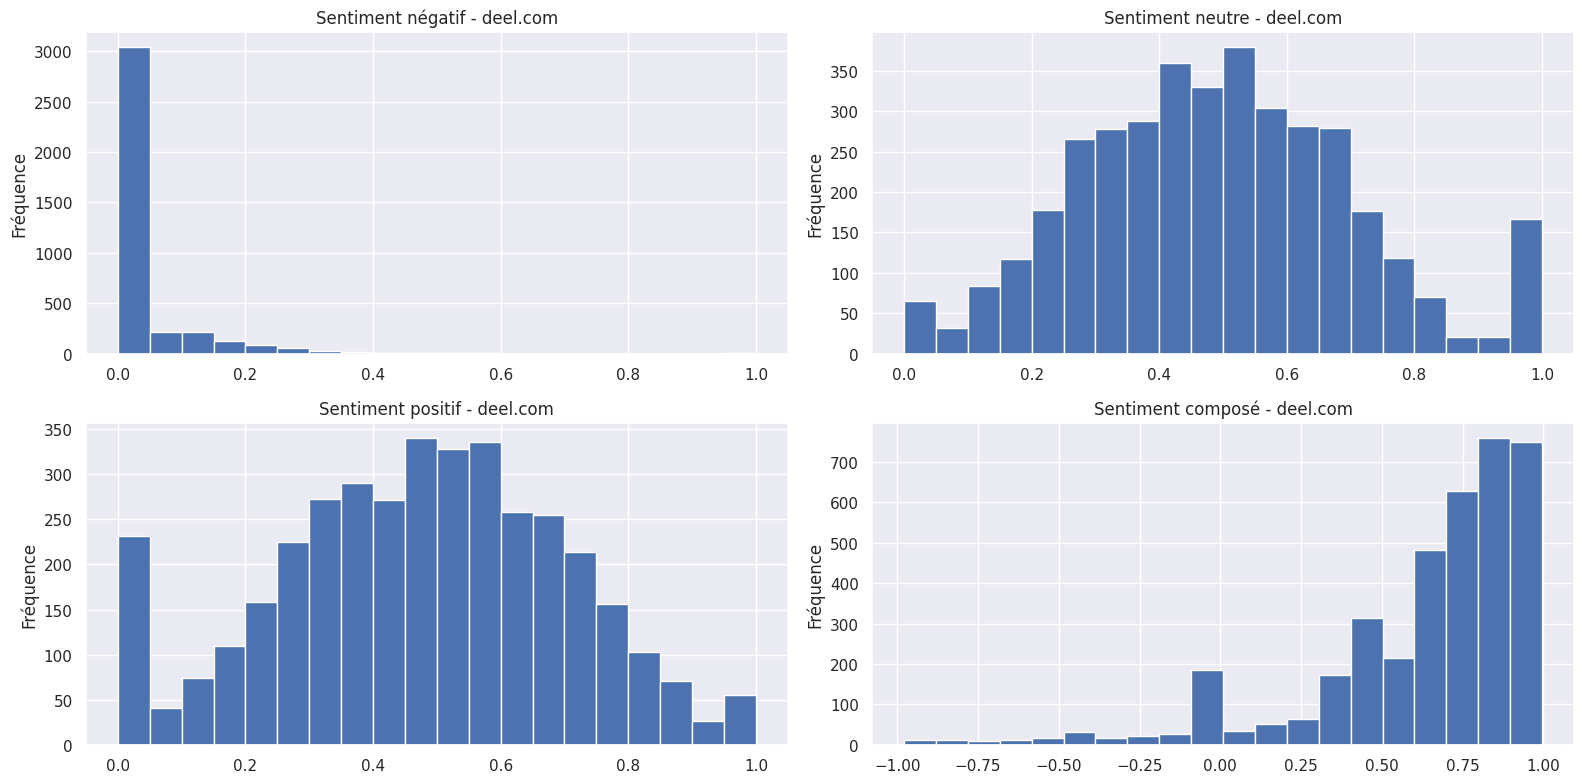

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_clean[df_clean['app']=='deel.com']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - deel.com')
df_clean[df_clean['app']=='deel.com']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - deel.com')
df_clean[df_clean['app']=='deel.com']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - deel.com')
df_clean[df_clean['app']=='deel.com']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - deel.com')
plt.tight_layout()

plt.show()

#### 5.1.2 remote.com

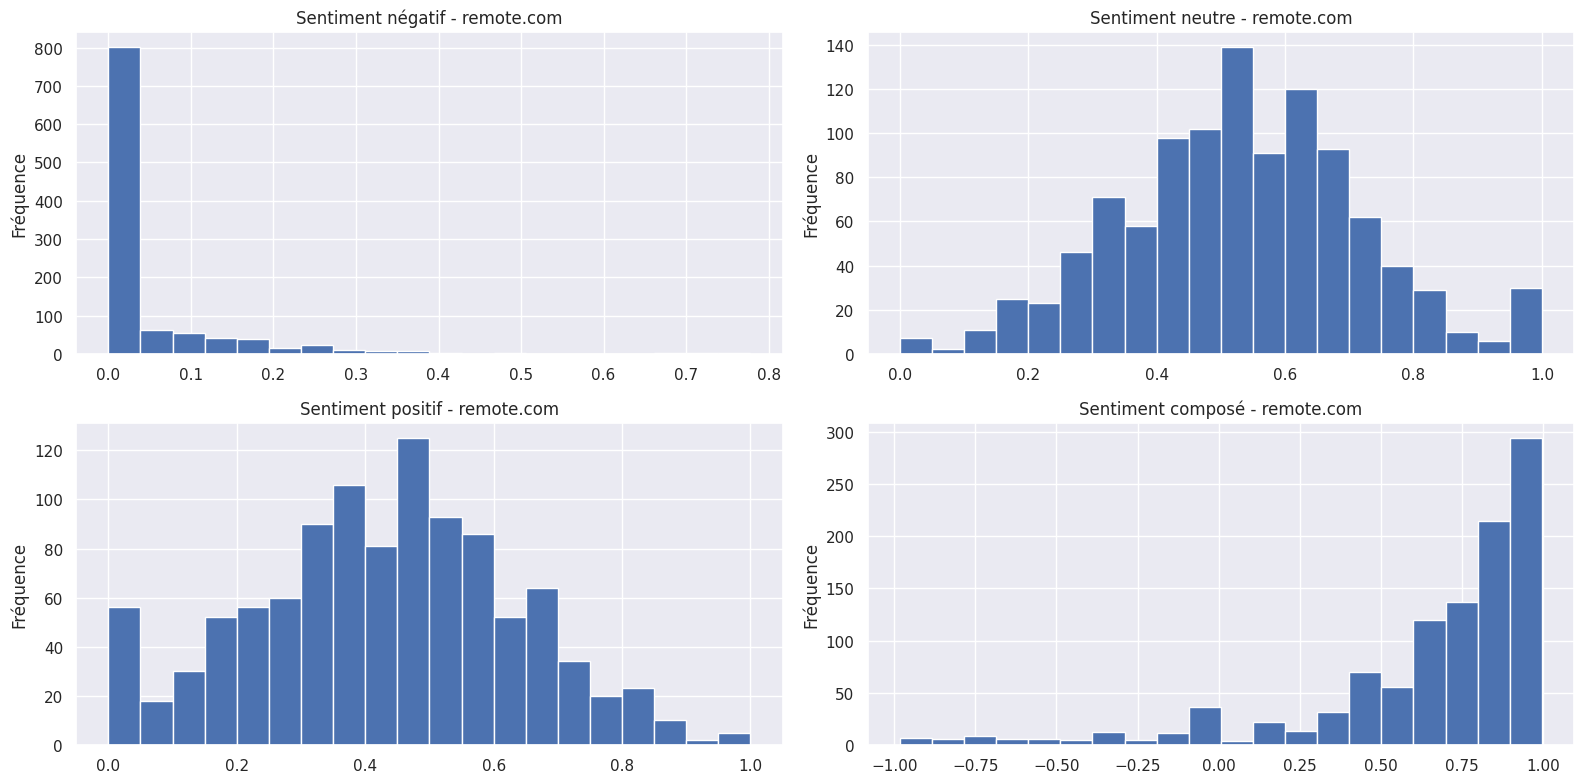

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_clean[df_clean['app']=='remote.com']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - remote.com')
df_clean[df_clean['app']=='remote.com']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - remote.com')
df_clean[df_clean['app']=='remote.com']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - remote.com')
df_clean[df_clean['app']=='remote.com']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - remote.com')
plt.tight_layout()

plt.show()

-  oysterhr.com

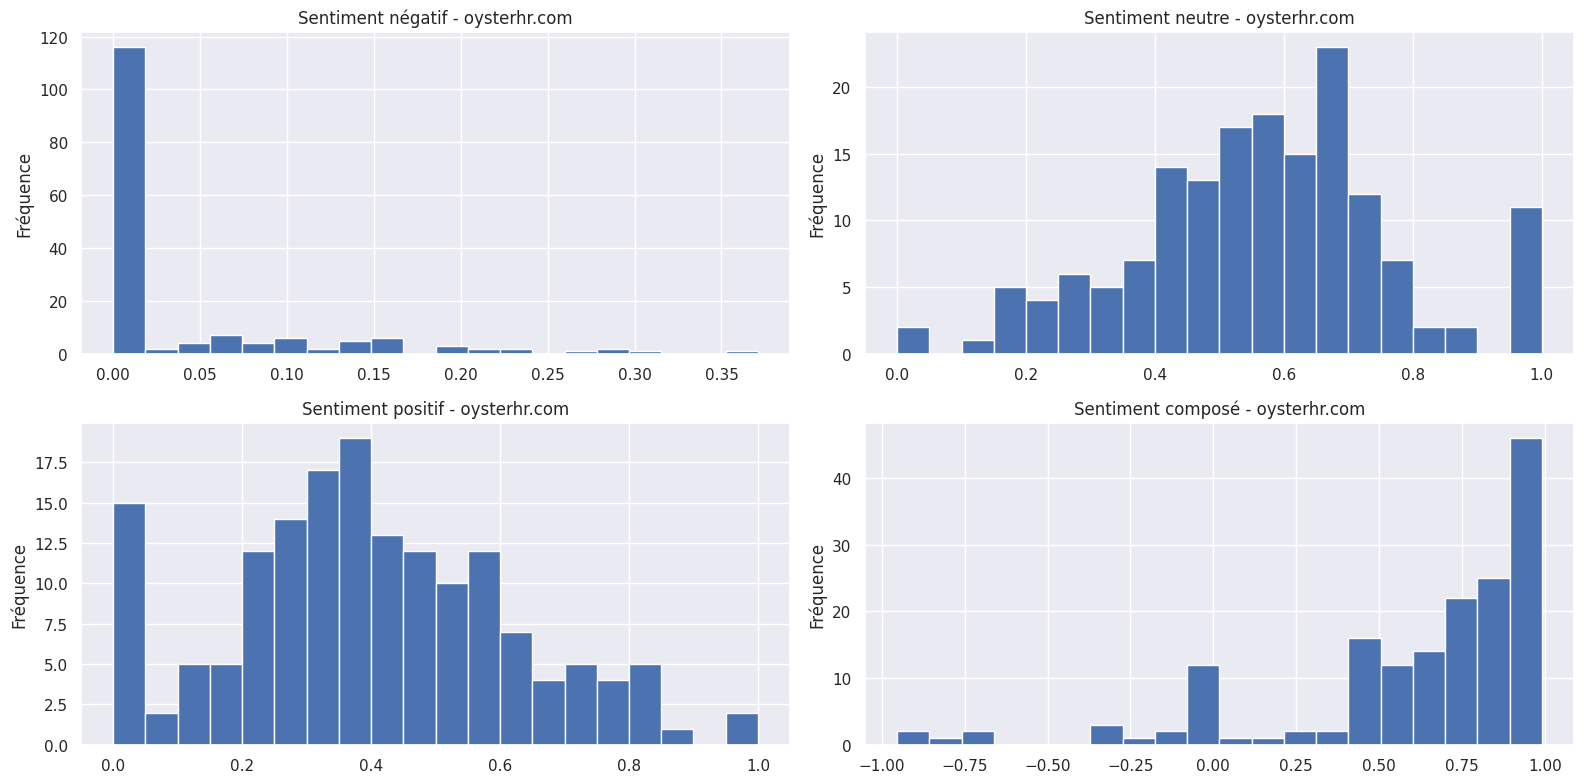

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_clean[df_clean['app']=='oysterhr.com']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - oysterhr.com')
df_clean[df_clean['app']=='oysterhr.com']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - oysterhr.com')
df_clean[df_clean['app']=='oysterhr.com']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - oysterhr.com')
df_clean[df_clean['app']=='oysterhr.com']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - oysterhr.com')
plt.tight_layout()
plt.show()

- multiplier.com

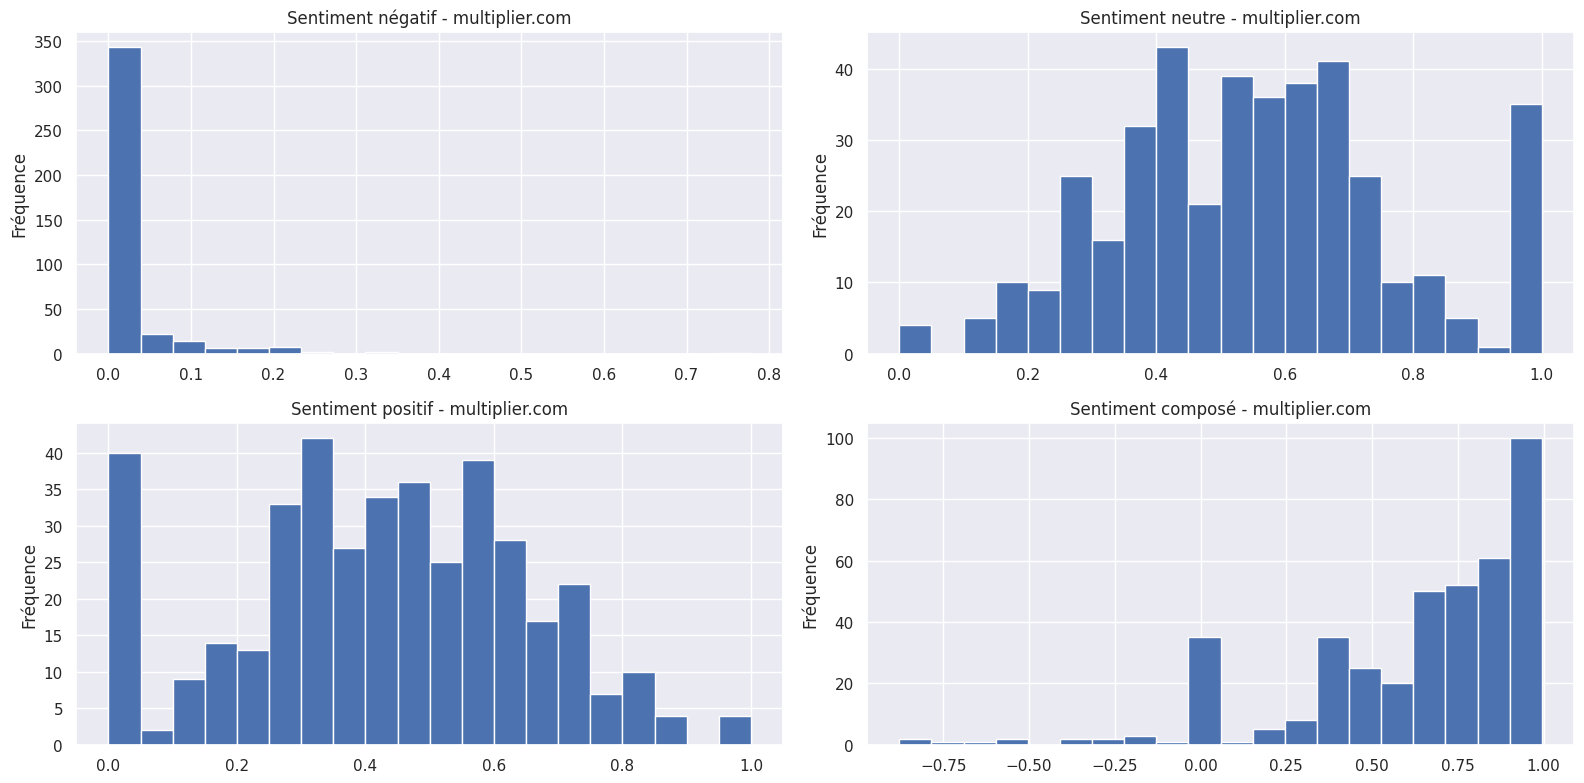

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_clean[df_clean['app']=='multiplier.com']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - multiplier.com')
df_clean[df_clean['app']=='multiplier.com']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - multiplier.com')
df_clean[df_clean['app']=='multiplier.com']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - multiplier.com')
df_clean[df_clean['app']=='multiplier.com']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - multiplier.com')
plt.tight_layout()

plt.show()

- rippling.com

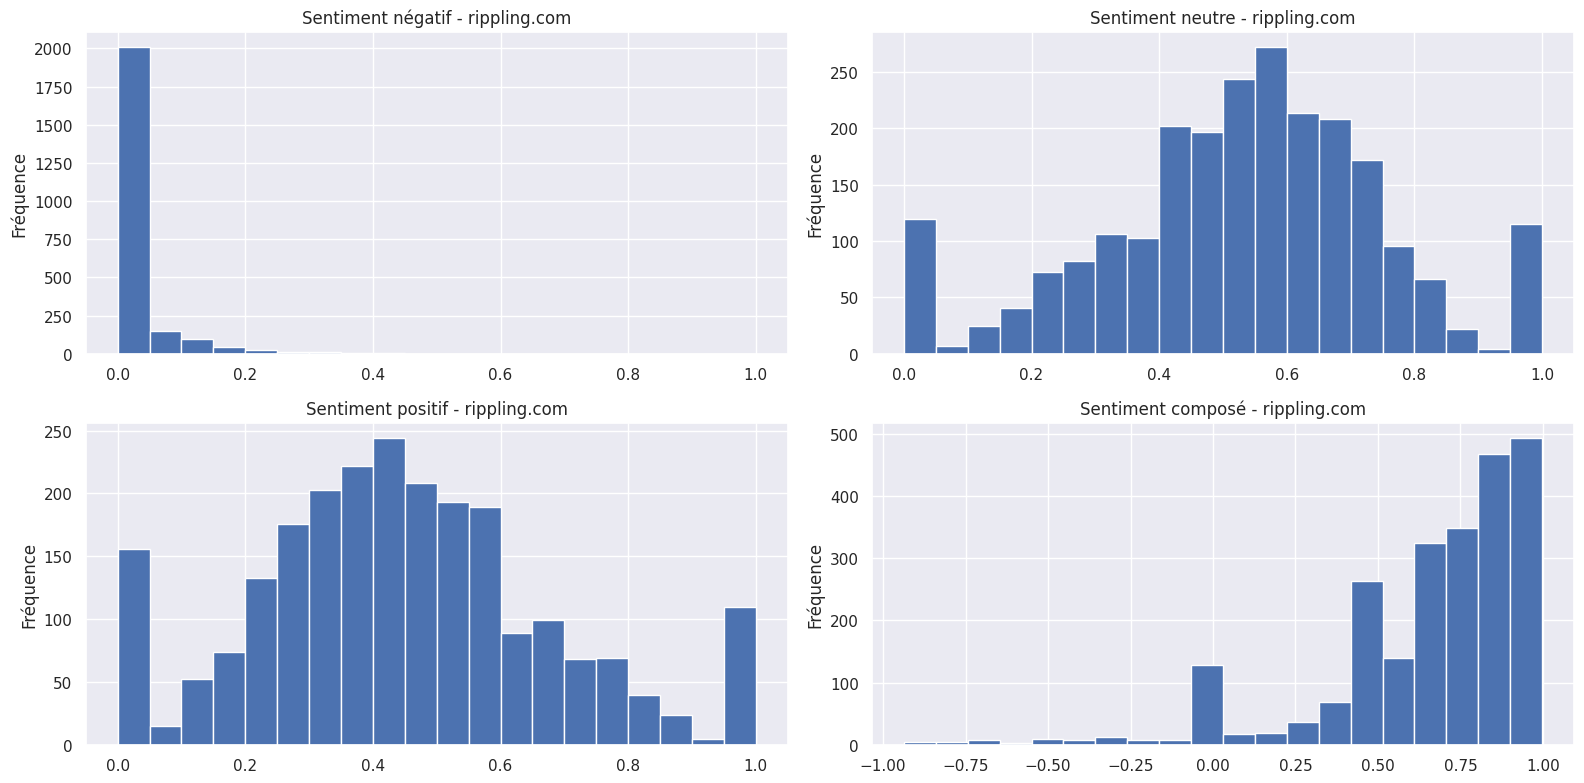

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_clean[df_clean['app']=='rippling.com']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - rippling.com')
df_clean[df_clean['app']=='rippling.com']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - rippling.com')
df_clean[df_clean['app']=='rippling.com']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - rippling.com')
df_clean[df_clean['app']=='rippling.com']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - rippling.com')
plt.tight_layout()

plt.show()

##### Interprétation

- Pour chacune des applications : deel.com, remote.com, oysterhr.com, multiplier.com, rippling.com, la composante négative des scores de sentiment est presque nulle pour la majorité des avis.

- Les valeurs des composantes relatives aux sentiments neutre et positif sont pour la plupart positives (supérieure à 0,2)

- En d'autres termes, la plupart des utilisateurs apprécient les cinq applications comme en témoigne la distribution des scores composés qui est étalée vers la droite avec des scores majoritairement supérieurs à 0 

### 5.2 Moyenne des scores composés

- La moyenne est un indicateur pour apprécier de manière globale une population. Nous calculons le score composé moyen pour chaque application

In [103]:
moy_comp = df_clean.groupby('app')['compound'].mean().reset_index()
moy_comp.columns = ['Applications', 'Score composé moyen']
moy_comp.set_index('Applications', inplace=True)
moy_comp

,Score composé moyen
Applications,
deel.com,0.633902
multiplier.com,0.628702
oysterhr.com,0.608701
remote.com,0.650424
rippling.com,0.655707


- Nous visualisons le score composé moyen par application à travers le graphe ci-dessous :

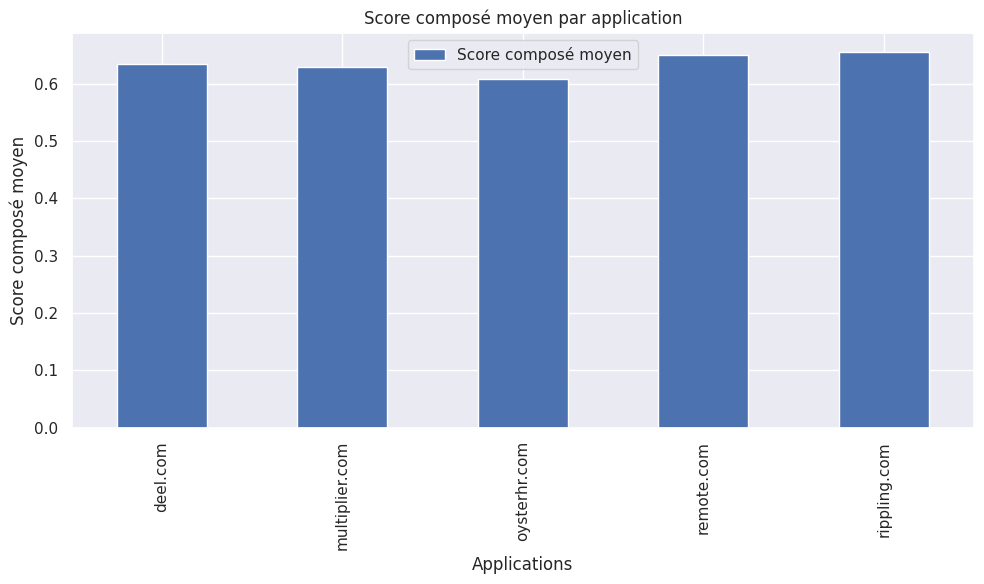

In [107]:
moy_comp.plot(kind='bar', figsize=(10, 6), xlabel='Applications', ylabel='Score composé moyen', title='Score composé moyen par application')
plt.tight_layout()
plt.show()

##### Interprétation

- Le score composé représente le sentiment général d'une phrase en normalisant les trois autres scores (négatif, neutre et positif) entre -1 et +1

- Un score composé supérieur à 0 témoigne d'un sentiment globalement positif dans la phrase (1 étant la valeur extrême correspondant à un sentiment très positif)
  
- Un score composé inférieur à 0 témoigne d'un sentiment globalement négatif dans la phrase (-1 étant la valeur extrême correspondant à un sentiment très négatif)

- La moyenne des scores composés relativement à chaque application se trouve au dela de 0,6 comme nous le constatons à travers le tableau et le graphe ci-dessus. Ainsi les utilisateurs ont de manière générale une bonne appréciation de ces applications.

- Nous pouvons confirmer ces assertions en calculant et en représentant la répartition des utilisateurs par type de sentiment et par application

### 5.3 Répartition des utilisateurs par type de sentiment et par application

- Le tableau ci-dessous indique la répartition des utilisateurs par type de sentiment et par application

In [108]:
stat = df_clean.groupby('app')['sentiment'].value_counts()
stat = pd.DataFrame(stat)
stat.columns = ['Effectif']
stat

Effectif
app            sentiment          
deel.com       Positif        3455
               Neutre          192
               Négatif         168
multiplier.com Positif         357
               Neutre           35
               Négatif          14
oysterhr.com   Positif         141
               Négatif          12
               Neutre           11
remote.com     Positif         960
               Négatif          68
               Neutre           35
rippling.com   Positif        2179
               Neutre          128
               Négatif          62

- Nous visualisons la répartition précédente à travers les graphes ci-dessous
  
- Le sentiment positif domine pour toutes les applications

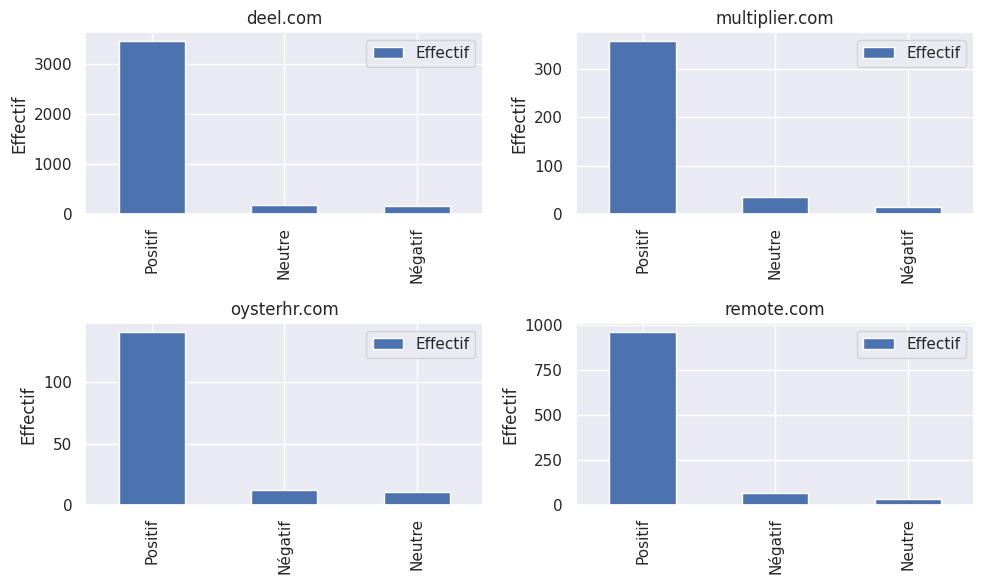

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

stat.loc['deel.com',:].plot(kind='bar', ax=axes[0, 0], figsize=(10, 6), xlabel='', ylabel='Effectif', title='deel.com')
stat.loc['multiplier.com',:].plot(kind='bar', ax=axes[0, 1], figsize=(10, 6), xlabel='', ylabel='Effectif', title='multiplier.com')
stat.loc['oysterhr.com',:].plot(kind='bar', ax=axes[1, 0], figsize=(10, 6), xlabel='', ylabel='Effectif', title='oysterhr.com')
stat.loc['remote.com',:].plot(kind='bar', ax=axes[1, 1], figsize=(10, 6), xlabel='', ylabel='Effectif', title='remote.com')
plt.tight_layout()

plt.show()

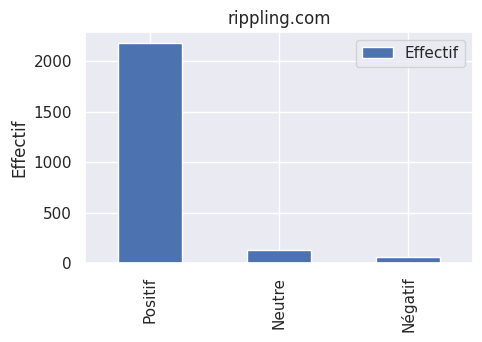

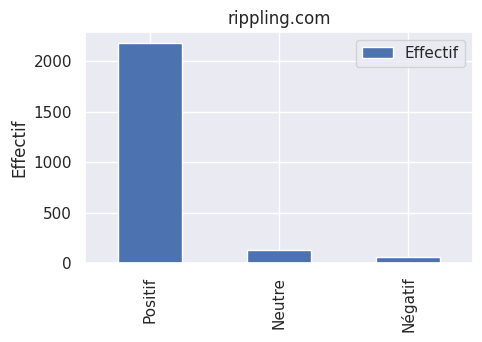

In [111]:
stat.loc['rippling.com',:].plot(kind='bar', figsize=(5, 3), xlabel='', ylabel='Effectif', title='rippling.com')
plt.show()

### 5.4 Identification des mots positifs fréquemment utilisés dans les avis

Pour identifier les mots les plus fréquemment utilisés dans les commentaires, nous adoptons la démarche suivante :

- Calcul de la fréquence de chaque mot dans l'ensemble des commentaires
  
- Tri des mots par ordre décroissant de leur fréquence d'apparition

- Filtrage des mots en retenant ceux dont la fréquence est supérieure à un certain seuil

- Visualisation des termes les plus significatifs

#### 5.4.1 deel.com

In [115]:
# Isolation des données de deel.com
df_deel = df_clean[df_clean['app']=='deel.com']

In [116]:
# Calcul de la fréquence de mots

word_freq_deel = df_deel['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_deel.columns = ['Mots', 'Fréquence']
word_freq_deel = word_freq_deel.sort_values(by='Fréquence', ascending=False)

word_freq_deel.head(10)

,Mots,Fréquence
57,support,1224.0
43,great,875.0
27,service,845.0
28,customer,802.0
41,easy,570.0
62,issue,561.0
70,team,545.0
76,platform,519.0
49,experience,502.0
16,time,468.0


In [117]:
# Récupération des mots les plus fréquemment utilisés 
word_freq_deel[word_freq_deel['Fréquence'] > 250]

,Mots,Fréquence
57,support,1224.0
43,great,875.0
27,service,845.0
28,customer,802.0
41,easy,570.0
62,issue,561.0
70,team,545.0
76,platform,519.0
49,experience,502.0
16,time,468.0


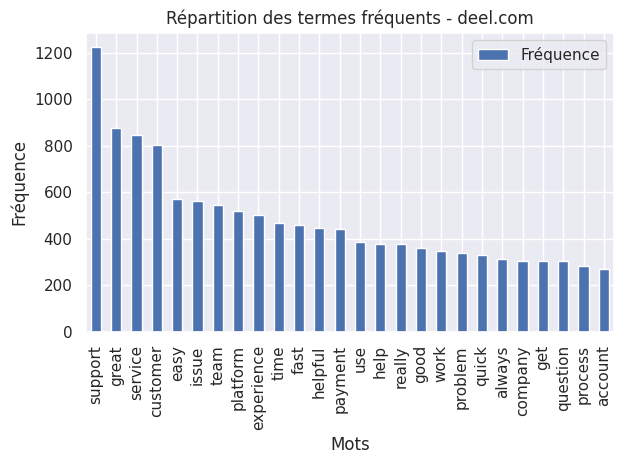

In [118]:
# Visualisation de la répartition des termes fréquents à propos de deel.com
word_freq_deel[word_freq_deel['Fréquence'] > 250].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - deel.com')
plt.tight_layout()
plt.show()

#### 5.4.2 remote.com

In [119]:
# Isolation des données de remote.com
df_remote = df_clean[df_clean['app']=='remote.com']

In [120]:
# Calcul de la fréquence de mots

word_freq_remote = df_remote['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_remote.columns = ['Mots', 'Fréquence']
word_freq_remote = word_freq_remote.sort_values(by='Fréquence', ascending=False)

word_freq_remote.head(10)

,Mots,Fréquence
61,support,374.0
47,great,292.0
57,team,255.0
58,service,251.0
73,experience,215.0
178,customer,205.0
16,employee,196.0
51,helpful,183.0
75,time,174.0
153,issue,165.0


In [121]:
# Récupération des mots les plus fréquemment utilisés 
word_freq_remote[word_freq_remote['Fréquence'] > 100]

,Mots,Fréquence
61,support,374.0
47,great,292.0
57,team,255.0
58,service,251.0
73,experience,215.0
178,customer,205.0
16,employee,196.0
51,helpful,183.0
75,time,174.0
153,issue,165.0


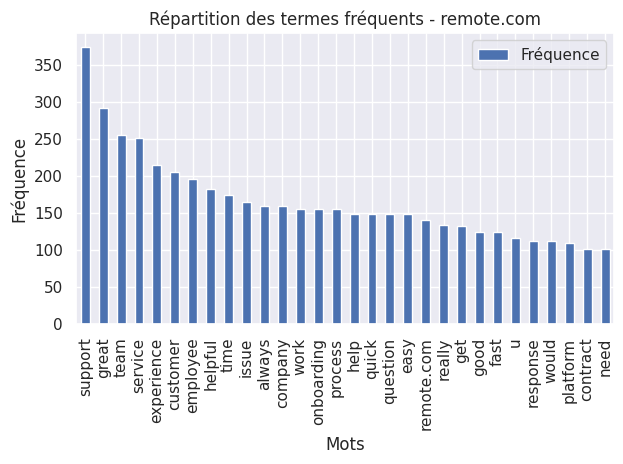

In [122]:
# Visualisation de la répartition des termes fréquents à propos de remote.com
word_freq_remote[word_freq_remote['Fréquence'] > 100].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - remote.com')
plt.tight_layout()
plt.show()

#### 5.4.3 multiplier.com

In [123]:
# Isolation des données de multiplier.com
df_multiplier = df_clean[df_clean['app']=='multiplier.com']

In [124]:
# Calcul de la fréquence de mots

word_freq_multiplier = df_multiplier['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_multiplier.columns = ['Mots', 'Fréquence']
word_freq_multiplier = word_freq_multiplier.sort_values(by='Fréquence', ascending=False)

word_freq_multiplier.head(10)

,Mots,Fréquence
18,team,98.0
65,support,95.0
31,helpful,86.0
28,great,83.0
13,service,83.0
223,experience,70.0
23,time,66.0
30,sherwin,62.0
3,customer,61.0
73,issue,59.0


In [125]:
# Récupération des mots les plus fréquemment utilisés 
word_freq_multiplier[word_freq_multiplier['Fréquence'] > 30]

,Mots,Fréquence
18,team,98.0
65,support,95.0
31,helpful,86.0
28,great,83.0
13,service,83.0
223,experience,70.0
23,time,66.0
30,sherwin,62.0
3,customer,61.0
73,issue,59.0


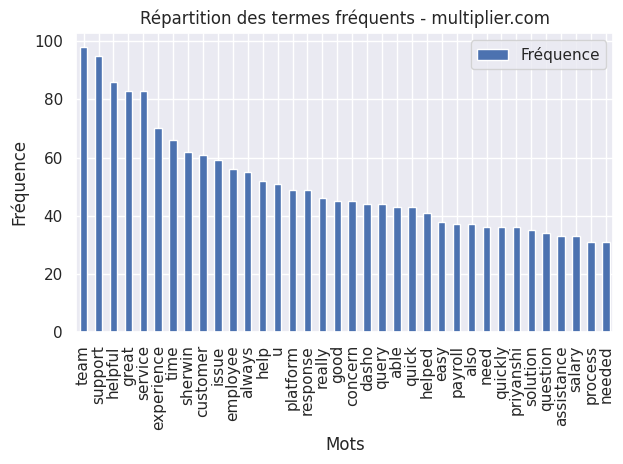

In [126]:
# Visualisation de la répartition des termes fréquents à propos de multiplier.com
word_freq_multiplier[word_freq_multiplier['Fréquence'] > 30].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - multiplier.com')
plt.tight_layout()
plt.show()

#### 5.4.4 oysterhr.com

In [127]:
# Isolation des données de oysterhr.com
df_oysterhr = df_clean[df_clean['app']=='oysterhr.com']

In [128]:
# Calcul de la fréquence de mots

word_freq_oysterhr = df_oysterhr['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_oysterhr.columns = ['Mots', 'Fréquence']
word_freq_oysterhr = word_freq_oysterhr.sort_values(by='Fréquence', ascending=False)

word_freq_oysterhr.head(10)

,Mots,Fréquence
16,easy,65.0
50,experience,53.0
63,employee,42.0
17,team,41.0
25,process,38.0
88,use,36.0
74,support,34.0
13,great,34.0
205,company,31.0
15,platform,31.0


In [129]:
# Récupération des mots les plus fréquemment utilisés 
word_freq_oysterhr[word_freq_oysterhr['Fréquence'] > 20]

,Mots,Fréquence
16,easy,65.0
50,experience,53.0
63,employee,42.0
17,team,41.0
25,process,38.0
88,use,36.0
74,support,34.0
13,great,34.0
205,company,31.0
15,platform,31.0


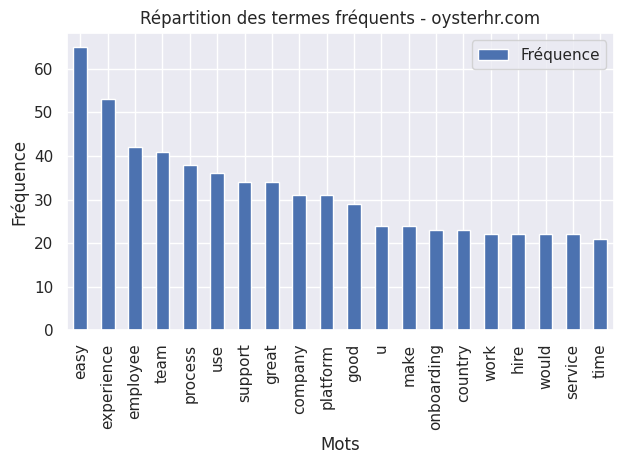

In [130]:
# Visualisation de la répartition des termes fréquents à propos de oysterhr.com
word_freq_oysterhr[word_freq_oysterhr['Fréquence'] > 20].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - oysterhr.com')
plt.tight_layout()
plt.show()

#### 5.4.5 rippling.com

In [131]:
# Isolation des données de rippling.com
df_rippling = df_clean[df_clean['app']=='rippling.com']

In [132]:
# Calcul de la fréquence de mots

word_freq_rippling = df_rippling['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_rippling.columns = ['Mots', 'Fréquence']
word_freq_rippling = word_freq_rippling.sort_values(by='Fréquence', ascending=False)

word_freq_rippling.head(10)

,Mots,Fréquence
81,easy,1135.0
125,use,695.0
36,great,564.0
1,time,468.0
104,hr,463.0
25,company,447.0
186,benefit,421.0
76,employee,400.0
103,payroll,385.0
159,experience,356.0


In [133]:
# Récupération des mots les plus fréquemment utilisés 
word_freq_rippling[word_freq_rippling['Fréquence'] > 200]

,Mots,Fréquence
81,easy,1135.0
125,use,695.0
36,great,564.0
1,time,468.0
104,hr,463.0
25,company,447.0
186,benefit,421.0
76,employee,400.0
103,payroll,385.0
159,experience,356.0


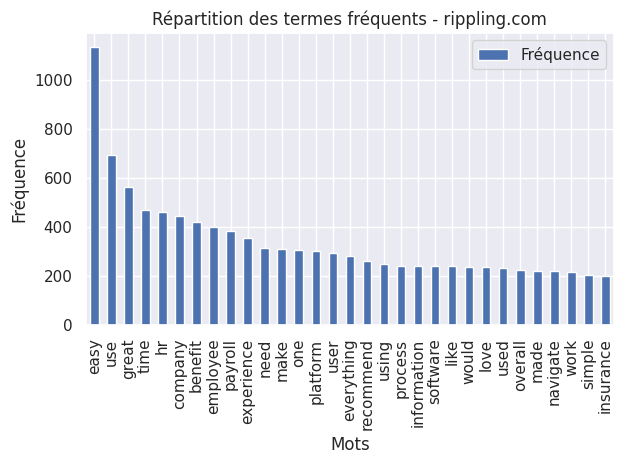

In [134]:
# Visualisation de la répartition des termes fréquents à propos de rippling.com
word_freq_rippling[word_freq_rippling['Fréquence'] > 200].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - rippling.com')
plt.tight_layout()
plt.show()

### 5.5 Nuage des mots positifs dans les avis

- Dans cette section, nous créons et visualisons un nuage de mots en utilisant l'ensemble des commentaires

- Le but est d'afficher les mots fréquents dans un format visuel adapté, montrant clairement leur importance et leur prévalence dans les commentaires.

- Cela permettra une observation rapide des tendances clés et des caractéristiques importantes des avis des utilisateurs

In [135]:
from wordcloud import WordCloud

In [136]:
import seaborn as sns
sns.reset_orig()

#### 5.5.1 deel.com

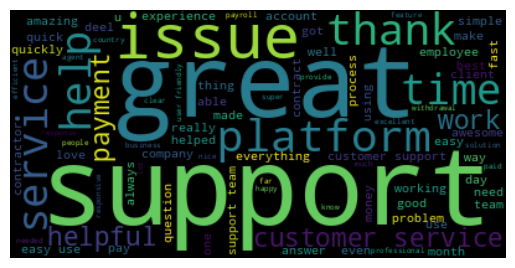

In [137]:
text = " ".join(i for i in df_deel.avis_clean)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.5.2 remote.com

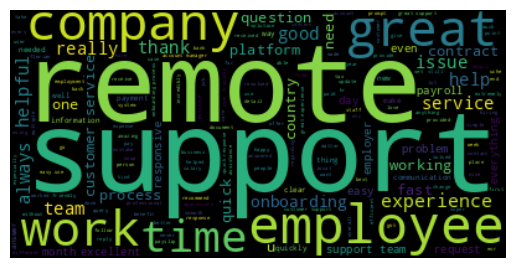

In [138]:
text = " ".join(i for i in df_remote.avis_clean)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.5.3 multiplier.com

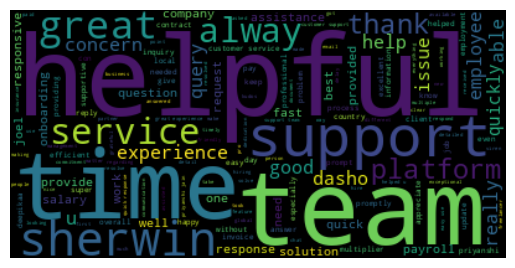

In [139]:
text = " ".join(i for i in df_multiplier.avis_clean)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.5.4 oysterhr.com

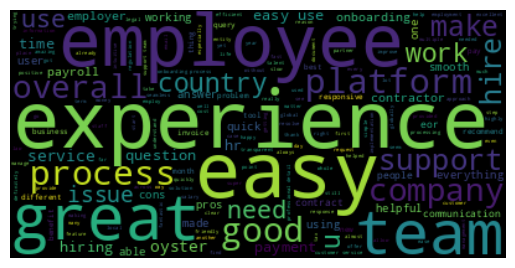

In [140]:
text = " ".join(i for i in df_oysterhr.avis_clean)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.5.5 rippling.com

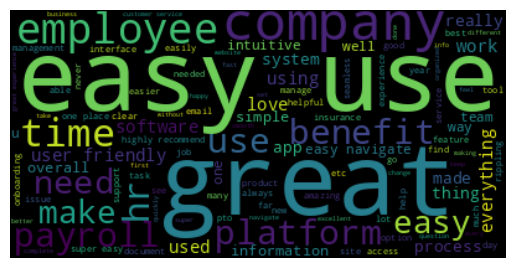

In [141]:
text = " ".join(i for i in df_rippling.avis_clean)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Interprétation

Les section 5.4 et 5.5 qui nous ont permis d'identifier et de visualiser les termes fréquemment utilisés dans les commentaires. Nous ennumérons les plus pertinents par application :

- a) deel.com : support, great, service, easy, fast, helpful, good, quick

- b) remote.com : support, great, helpful, quick, easy, good

- c) multiplier.com : team, support, helpful, great, service, experience, good, quick, easy, assistance, solution, payroll

- d) oysterhr.com : easy, support, great, company, good, onboarding

- e) rippling.com : easy, great, benefit, payroll, platform, recommend, process, software, like, love, simple, insurance

De manière générale pour ces cinq applications, les utilisateurs ont utilisé des termes positifs pour exprimer la manière dont ils perçoivent le service qui leur est fourni. Ces utilisateurs mettent l'accent sur des aspects tels que :

- L'expérience utilisateur
- La simplicité d'utilisation des applications
- La disponibilité et la rapidité du support pour répondre à leurs requêtes
- La gestion de la paie
- La possibilité de souscrire à une police d'assurance
- La convenance des applications pour les entreprises qui les utilisent pour solliciter des ressources humaines


### 5.6 Identification des mots négatifs fréquemment utilisés dans les avis

In [142]:
from wordcloud import WordCloud

#### 5.6.1 Termes négatifs à propos de deel.com

In [143]:
# Calcul de la fréquence de mots correspondants aux commentaires négatifs sur deel.com

neg_word_deel = df_deel[df_deel['sentiment']=='Négatif']['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
neg_word_deel.columns = ['Mots négatifs', 'Fréquence']
neg_word_deel = neg_word_deel.sort_values(by='Fréquence', ascending=False)
neg_word_deel.head(10)

,Mots négatifs,Fréquence
3,problem,81.0
74,service,63.0
29,time,52.0
18,customer,46.0
182,employee,44.0
220,get,41.0
92,payment,40.0
17,account,37.0
109,issue,37.0
230,month,37.0


In [144]:
# Récupération des mots négatifs les plus fréquemment utilisés 
neg_word_deel[neg_word_deel['Fréquence'] > 20].head()

,Mots négatifs,Fréquence
3,problem,81.0
74,service,63.0
29,time,52.0
18,customer,46.0
182,employee,44.0


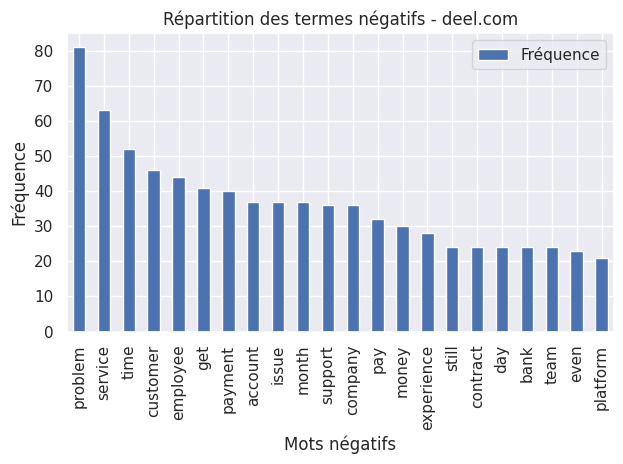

In [147]:
# Visualisation de la répartition des termes négatifs à propos de deel.com
sns.set_theme()
neg_word_deel[neg_word_deel['Fréquence'] > 20].plot.bar(x='Mots négatifs', y='Fréquence', ylabel='Fréquence', title='Répartition des termes négatifs - deel.com')
plt.tight_layout()
plt.show()

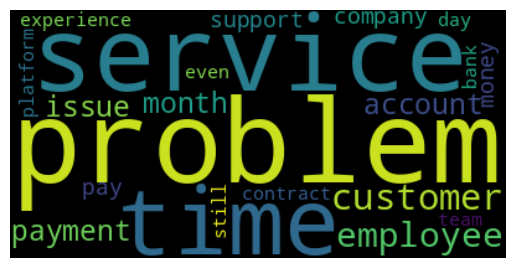

In [148]:
# nuage de mots négatifs

sns.reset_orig()

text = " ".join(i for i in neg_word_deel[neg_word_deel['Fréquence'] > 20]['Mots négatifs'])
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.6.2 Termes négatifs à propos de remote.com

In [149]:
# Calcul de la fréquence de mots correspondants aux commentaires négatifs sur remote.com

neg_word_remote = df_remote[df_remote['sentiment']=='Négatif']['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
neg_word_remote.columns = ['Mots négatifs', 'Fréquence']
neg_word_remote = neg_word_remote.sort_values(by='Fréquence', ascending=False)
neg_word_remote.head(10)

,Mots négatifs,Fréquence
238,contract,33.0
125,month,33.0
15,company,30.0
3,remote.com,24.0
46,experience,22.0
4,get,20.0
220,week,19.0
173,one,19.0
227,time,19.0
16,employee,18.0


In [150]:
# Récupération des mots négatifs les plus fréquemment utilisés 
neg_word_remote[neg_word_remote['Fréquence'] > 10].head()

,Mots négatifs,Fréquence
238,contract,33.0
125,month,33.0
15,company,30.0
3,remote.com,24.0
46,experience,22.0


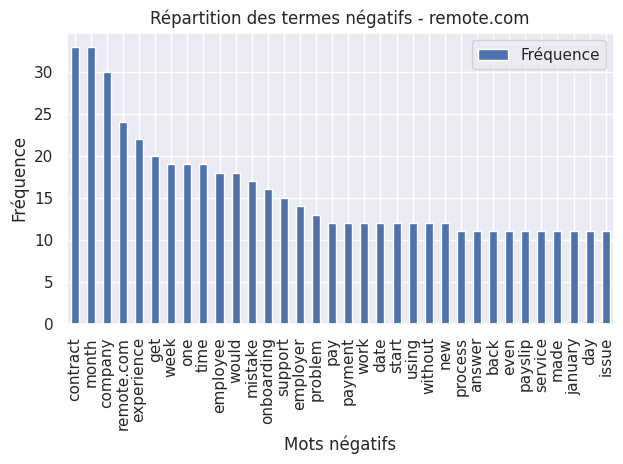

In [151]:
# Visualisation de la répartition des termes négatifs à propos de remote.com
sns.set_theme()
neg_word_remote[neg_word_remote['Fréquence'] > 10].plot.bar(x='Mots négatifs', y='Fréquence', ylabel='Fréquence', title='Répartition des termes négatifs - remote.com')
plt.tight_layout()
plt.show()

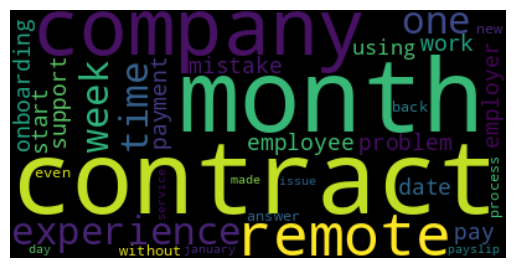

In [152]:
# nuage de mots négatifs

sns.reset_orig()

text = " ".join(i for i in neg_word_remote[neg_word_remote['Fréquence'] > 10]['Mots négatifs'])
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.6.3 Termes négatifs à propos de multiplier.com

In [153]:
# Calcul de la fréquence de mots correspondants aux commentaires négatifs sur multiplier.com

neg_word_multiplier = df_multiplier[df_multiplier['sentiment']=='Négatif']['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
neg_word_multiplier.columns = ['Mots négatifs', 'Fréquence']
neg_word_multiplier = neg_word_multiplier.sort_values(by='Fréquence', ascending=False)
neg_word_multiplier.head(10)

,Mots négatifs,Fréquence
91,time,7.0
89,service,6.0
73,bad,5.0
2,asked,5.0
3,without,5.0
71,salary,5.0
14,insurance,4.0
88,experience,4.0
31,issue,4.0
0,even,4.0


In [154]:
# Récupération des mots négatifs les plus fréquemment utilisés 
neg_word_multiplier[neg_word_multiplier['Fréquence'] > 2].head()

,Mots négatifs,Fréquence
91,time,7.0
89,service,6.0
73,bad,5.0
2,asked,5.0
3,without,5.0


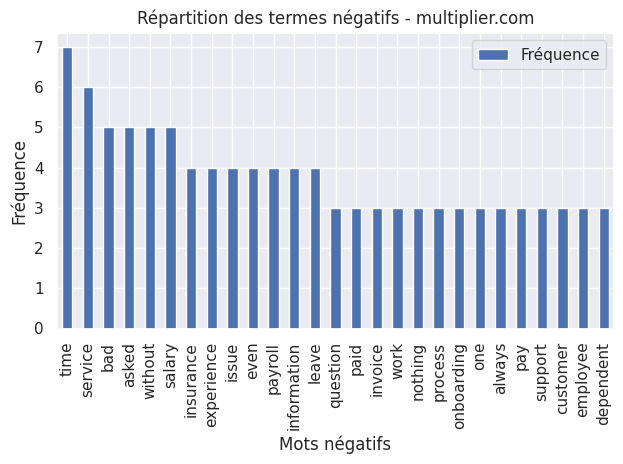

In [155]:
# Visualisation de la répartition des termes négatifs à propos de multiplier.com
sns.set_theme()
neg_word_multiplier[neg_word_multiplier['Fréquence'] > 2].plot.bar(x='Mots négatifs', y='Fréquence', ylabel='Fréquence', title='Répartition des termes négatifs - multiplier.com')
plt.tight_layout()
plt.show()

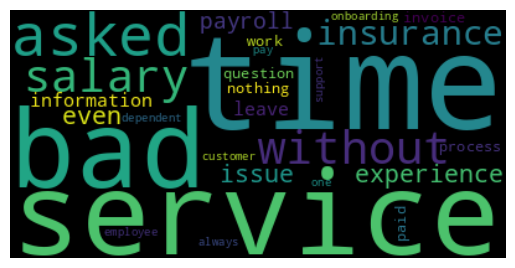

In [156]:
# nuage de mots négatifs

sns.reset_orig()

text = " ".join(i for i in neg_word_multiplier[neg_word_multiplier['Fréquence'] > 2]['Mots négatifs'])
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.6.4 Termes négatifs à propos de oysterhr.com

In [157]:
# Calcul de la fréquence de mots correspondants aux commentaires négatifs sur oysterhr.com

neg_word_oysterhr = df_oysterhr[df_oysterhr['sentiment']=='Négatif']['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
neg_word_oysterhr.columns = ['Mots négatifs', 'Fréquence']
neg_word_oysterhr = neg_word_oysterhr.sort_values(by='Fréquence', ascending=False)
neg_word_oysterhr.head(10)

,Mots négatifs,Fréquence
167,pay,9.0
0,issue,7.0
89,contractor,6.0
85,month,6.0
95,first,5.0
93,employer,5.0
63,experience,5.0
26,answer,4.0
115,get,4.0
168,money,4.0


In [158]:
# Récupération des mots négatifs les plus fréquemment utilisés 
neg_word_oysterhr[neg_word_oysterhr['Fréquence'] > 2].head()

,Mots négatifs,Fréquence
167,pay,9.0
0,issue,7.0
89,contractor,6.0
85,month,6.0
95,first,5.0


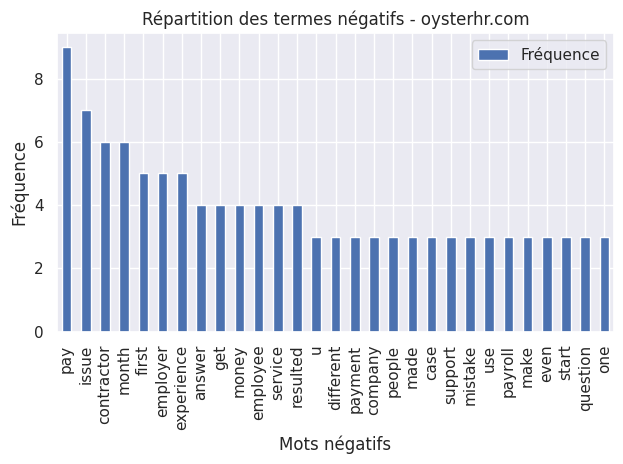

In [159]:
# Visualisation de la répartition des termes négatifs à propos de oysterhr.com
sns.set_theme()
neg_word_oysterhr[neg_word_oysterhr['Fréquence'] > 2].plot.bar(x='Mots négatifs', y='Fréquence', ylabel='Fréquence', title='Répartition des termes négatifs - oysterhr.com')
plt.tight_layout()
plt.show()

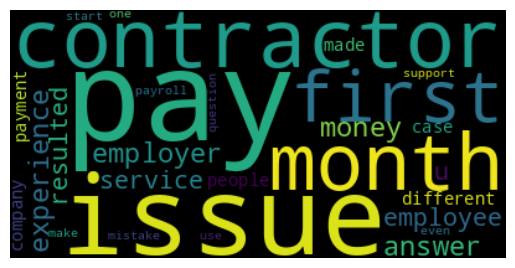

In [160]:
# nuage de mots négatifs

sns.reset_orig()

text = " ".join(i for i in neg_word_oysterhr[neg_word_oysterhr['Fréquence'] > 2]['Mots négatifs'])
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 5.6.5 Termes négatifs à propos de rippling.com

In [161]:
# Calcul de la fréquence de mots correspondants aux commentaires négatifs sur rippling.com

neg_word_rippling = df_rippling[df_rippling['sentiment']=='Négatif']['avis_clean'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
neg_word_rippling.columns = ['Mots négatifs', 'Fréquence']
neg_word_rippling = neg_word_rippling.sort_values(by='Fréquence', ascending=False)
neg_word_rippling.head(10)

,Mots négatifs,Fréquence
2,company,24.0
199,payroll,21.0
73,time,19.0
245,experience,14.0
164,employee,13.0
138,customer,11.0
155,service,11.0
15,information,11.0
105,tax,10.0
48,get,10.0


In [162]:
# Récupération des mots négatifs les plus fréquemment utilisés 
neg_word_rippling[neg_word_rippling['Fréquence'] > 7].head()

,Mots négatifs,Fréquence
2,company,24.0
199,payroll,21.0
73,time,19.0
245,experience,14.0
164,employee,13.0


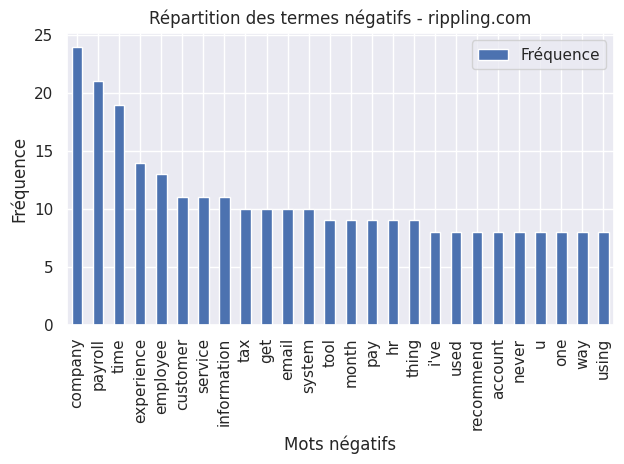

In [163]:
# Visualisation de la répartition des termes négatifs à propos de rippling.com
sns.set_theme()
neg_word_rippling[neg_word_rippling['Fréquence'] > 7].plot.bar(x='Mots négatifs', y='Fréquence', ylabel='Fréquence', title='Répartition des termes négatifs - rippling.com')
plt.tight_layout()
plt.show()

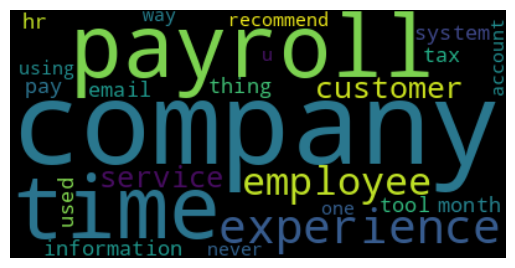

In [164]:
# nuage de mots négatifs

sns.reset_orig()

text = " ".join(i for i in neg_word_rippling[neg_word_rippling['Fréquence'] > 7]['Mots négatifs'])
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

###### Interprétation

Dans la section 5.6 nous avons identifié et visualisé les termes négatifs fréquemment utilisés dans les commentaires. Notons que ces termes sont en minorité par rapport aux termes positifs. Nous ennumérons les termes négatifs les plus pertinents par application :

- a) deel.com : problem, service

- b) remote.com : mistake, problem

- c) multiplier.com : bad, leave, insurance

- d) oysterhr.com : mistake, pay, issue

- e) rippling.com : tax, never, information

Ainsi quelques rares sentiments négatifs sont exprimés par les utilisateurs des cinq applications. Ils évoquent entre autres:

- Des erreurs liées au paiement
- Une mauvaise qualité de service
- Des problèmes liés à l'assurance

## 6. Recommandations pour l'amélioration de la plateforme de Talent Virtuel

En somme, les utilisateurs ont beaucoup d'attentes vis-à-vis des plateformes. La plateforme de talent virtuel devra combler ces attentes que sont :

- Une expérience utilisateur impécable
- Une plateforme intuitive et simple d'utilisation
- Un support disponible et actif pour répondre rapidement aux requêtes
- La souscription des utilisateurs à une police d'assurance
- La transparence dans le paiement des utilisateurs
- Proposer une offre spéciale aux entreprises qui ont recours à la plateforme pour solliciter des ressources humaines